# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import connections
import requests
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd
import json
import scipy.stats as stats
from scipy.stats import linregress
from citipy import citipy
import numpy as np
from sklearn import datasets
import kdtree
import random


# Remember to update the config file with your API key
from api_keys import weather_key
from api_keys import g_key


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

#create a lat/lon
lat = []
lon = []

for i in range(5):
    lat.append(random.randint(-85,85))
for j in range(5):   
    lon.append(random.randint(-180,180))


weather_df = pd.DataFrame({
    "Latitude" : lat,
    "Longitude" : lon,
   })
weather_df.dtypes


Latitude     int64
Longitude    int64
dtype: object

## Generate Cities List

In [2]:
# weather_df.loc[row, column]
weather_df.loc[0]

Latitude      52
Longitude   -133
Name: 0, dtype: int64

In [3]:
# I used this from a class excercise to begin initially
# cities = ["Paris", "London", "Oslo", "Beijing", "Houston", "Chicago", "Taiwan", 
#           "Seattle", "San Francisco", "Denver", "Phoenix", "Buenos Aires", "Las Vegas"]


# set up lists to hold reponse info
weather_df['cities'] = ""
weather_df['humidity'] = ""
weather_df['max_temp'] = ""
weather_df['cloud'] = ""
weather_df['wind_sp'] = ""
weather_df.head()



# # add cities to list
for index, row in weather_df.iterrows():
    city = citipy.nearest_city(row['Latitude'], row['Longitude'])
    weather_df.loc[index, 'cities']=city.city_name
#     print(weather_df['cities'])
    #break

#print(city.city_name)
    




### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# # Loop through the list of cities and perform a request for data on each
for index, row in weather_df.iterrows():
    response = requests.get(query_url + row['cities']).json()
    print(response)
#     dataframe.loc[row, column]
    weather_df.loc[index, 'humidity']=response['main']['humidity']
    weather_df.loc[index, 'max_temp']=response['main']['temp_max']
    weather_df.loc[index, 'cloud']=response['clouds']['all']
    weather_df.loc[index, 'wind_sp']=response['wind']['speed']


    #Perform print function
    try:
        print(f"The city is {row['cities']}.")


    except (KeyError, IndexError):
        print("Missing city/result... skipping.")

print("------------")

{'coord': {'lon': -130.32, 'lat': 54.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 57.2, 'feels_like': 57.56, 'temp_min': 57.2, 'temp_max': 57.2, 'pressure': 1017, 'humidity': 93}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 50}, 'clouds': {'all': 90}, 'dt': 1600365585, 'sys': {'type': 1, 'id': 883, 'country': 'CA', 'sunrise': 1600352346, 'sunset': 1600397529}, 'timezone': -25200, 'id': 6113406, 'name': 'Prince Rupert', 'cod': 200}
The city is prince rupert.
{'coord': {'lon': 129.11, 'lat': 50.37}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 51.39, 'feels_like': 48.7, 'temp_min': 51.39, 'temp_max': 51.39, 'pressure': 1001, 'humidity': 95, 'sea_level': 1001, 'grnd_level': 974}, 'visibility': 10000, 'wind': {'speed': 4.92, 'deg': 102}, 'clouds': {'all': 59}, 'dt': 1600365878, 'sys': {'country': 'RU', 'sunrise': 16003

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# done with previous step
weather_df.head()

# # # output the csv file
# # output_file = "weather.csv"

,Latitude,Longitude,cities,humidity,max_temp,cloud,wind_sp
0,52,-133,prince rupert,93,57.2,90,2.24
1,50,129,yekaterinoslavka,95,51.39,59,4.92
2,49,-165,bethel,60,73.99,1,6.93
3,20,-126,guerrero negro,27,93.33,14,4.47
4,45,-128,newport,67,68,0,11.88


In [6]:
weather_df['humidity'] > 100

0    False
1    False
2    False
3    False
4    False
Name: humidity, dtype: bool

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

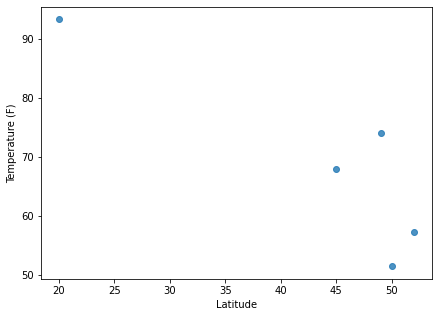

In [9]:
x_values = weather_df['Latitude']
y_values = weather_df['max_temp']

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

## Latitude vs. Humidity Plot

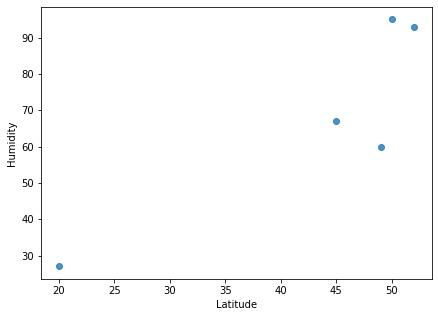

In [10]:
x_values = weather_df['Latitude']
y_values = weather_df['humidity']

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

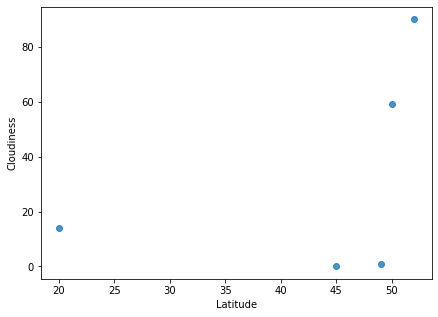

In [11]:
x_values = weather_df['Latitude']
y_values = weather_df['cloud']

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

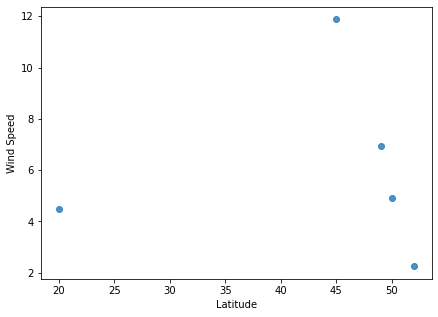

In [12]:
x_values = weather_df['Latitude']
y_values = weather_df['wind_sp']

plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7765242097156516
y = -1.09x + 115.82


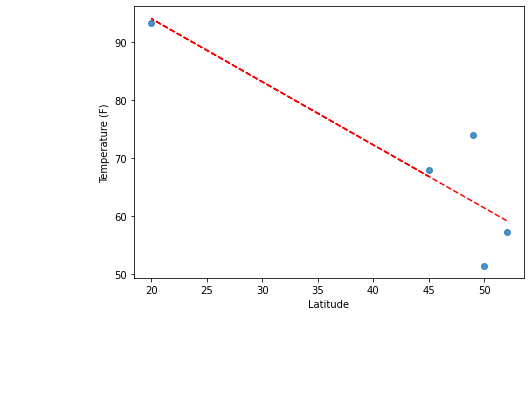

In [32]:
is_northern = weather_df[weather_df['Latitude']>=0]

x_values = is_northern['Latitude']
y_values = is_northern['max_temp'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [39]:
is_southern = weather_df[weather_df['Latitude']<=0]

x_values = is_southern['Latitude']
y_values = is_southern['max_temp'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.7882841748920417
y = 1.87x + -12.37


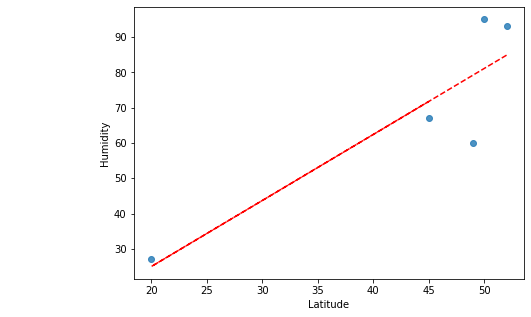

In [40]:
x_values = is_northern['Latitude']
y_values = is_northern['humidity'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [41]:
x_values = is_southern['Latitude']
y_values = is_southern['humidity'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1709110616368789
y = 1.25x + -21.24


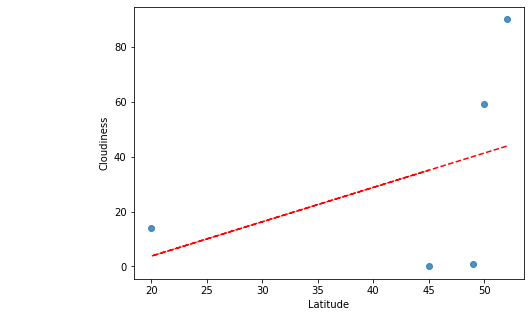

In [42]:
x_values = is_northern['Latitude']
y_values = is_northern['cloud'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [43]:
x_values = is_southern['Latitude']
y_values = is_southern['cloud'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

ValueError: Inputs must not be empty.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032892297198334796
y = 0.02x + 5.41


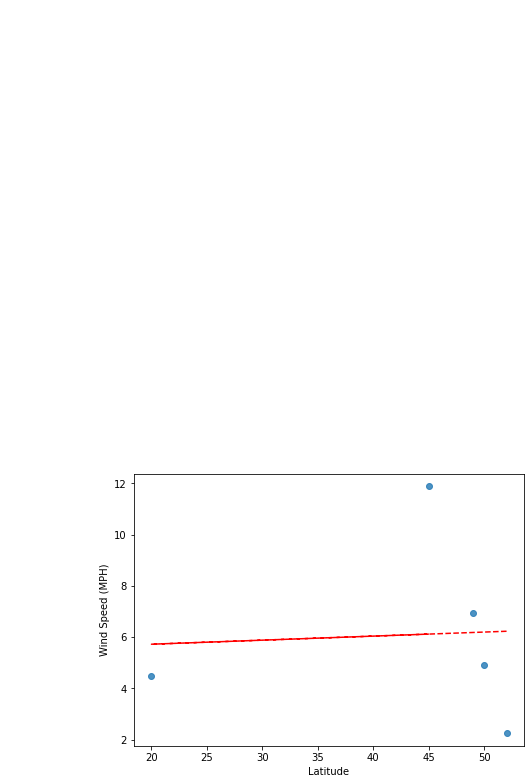

In [44]:
x_values = is_northern['Latitude']
y_values = is_northern['wind_sp'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
x_values = is_southern['Latitude']
y_values = is_southern['wind_sp'].astype(float)

# # Run the regression and store each of the returned values
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the predictions for each value of x (# Rooms)
regression_values = x_values * slope + intercept

# store a string version of the linear equation, so we can display it on the plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot
plt.figure(figsize=(7,5))
plt.scatter(x_values, y_values, alpha=0.8)
plt.plot(x_values, regression_values, linestyle="--", color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
#not sure why equation will not show on chart so added as a print
plt.annotate(line_eq, (7, 30), fontsize=20, color="red")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.show()